## Задание №1

Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом.
Очистите текст от пунктуации, приведите его к нижнему регистру, лемматизируйте и запишите в новый файл. Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота (абсолютная частота, разделенная на количество слов в тексте). Т.е. у самого частотного слова будет ранг 1, у второго по частоте -- 2 и т.д.
Очистите текст от стоп-слов. Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

Импортируем текст и очищаем от пунктуации, приводим к нижнему регистру

In [95]:
import string

f = open("Harry_Potter_and_the_Sorcerers_Stone.txt", "r")
text = f.read()
words_text = [w.strip("!\"#$%&'()*+,./:;<=>?@[\]^_`{|}~„“«»†*—/\-—‘") for w in text.split()] #чистим от пунктуации
words_text = [w for w in words_text if len(w) != 0]
text = ''.join(ch for ch in text if ch not in exclude)
text = text.lower()
text = text.replace("\n", " ")
text = text.replace("  ", " ")
text

'chapter one the boy who lived mr and mrs dursley of number four privet drive were proud to say that they were perfectly normal thank you very much they were the last people youd expect to be involved in anything strange or mysterious because they just didnt hold with such nonsense mr dursley was the director of a firm called grunnings which made drills he was a big beefy man with hardly any neck although he did have a very large mustache mrs dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors the dursleys had a small son called dudley and in their opinion there was no finer boy anywhere the dursleys had everything they wanted but they also had a secret and their greatest fear was that somebody would discover it they didnt think they could bear it if anyone found out about the potters mrs potter was mrs dursleys sister but they hadnt met for several years 

NLTK download

In [96]:
import nltk
# first time execution only
# nltk.download()

In [97]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

text_words = nltk.word_tokenize(text)

Лемматизируем и записываем в файл

In [98]:
f = open("lemmatized.txt", "w")
for word in text_words:
    f.write("{0:20}{1:20}".format(word, wordnet_lemmatizer.lemmatize(word, pos="v")) + "\n")

In [99]:
import operator
from collections import Counter

words_dict = Counter(text.split())
words_list = sorted(words_dict.items(), key=lambda v: v[1], reverse = True)
print(words_list)

[('the', 3603), ('and', 1870), ('to', 1845), ('a', 1667), ('he', 1497), ('of', 1255), ('harry', 1195), ('was', 1182), ('it', 993), ('in', 957), ('his', 935), ('you', 836), ('said', 794), ('had', 702), ('on', 631), ('at', 623), ('i', 609), ('that', 590), ('they', 586), ('as', 523), ('him', 492), ('but', 457), ('with', 413), ('ron', 408), ('all', 385), ('out', 371), ('be', 366), ('for', 366), ('up', 365), ('were', 340), ('what', 333), ('hagrid', 332), ('them', 322), ('have', 294), ('there', 257), ('back', 257), ('hermione', 254), ('one', 249), ('if', 241), ('from', 241), ('this', 240), ('not', 228), ('so', 227), ('she', 226), ('about', 221), ('its', 220), ('into', 219), ('their', 217), ('me', 211), ('been', 210), ('an', 209), ('off', 199), ('got', 196), ('didnt', 195), ('could', 193), ('get', 192), ('like', 188), ('know', 185), ('down', 179), ('when', 177), ('see', 177), ('her', 176), ('no', 174), ('just', 173), ('very', 172), ('professor', 172), ('is', 171), ('over', 169), ('looked', 16

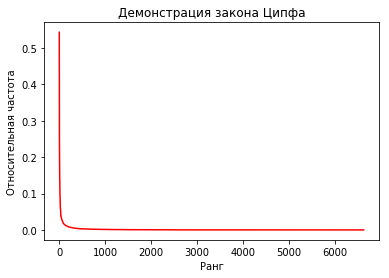

In [100]:
import matplotlib.pyplot as plt

words_number = len(words_list)
y = [i[1] / words_number for i in words_list] #частоту слов делим на количество слов в тексте
x = range(1, len(words_dict) + 1) #делаем слова по порядку
plt.plot(x, y, c="r")
plt.title("Демонстрация закона Ципфа")
plt.xlabel("Ранг")
plt.ylabel("Относительная частота")
plt.show()

In [101]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')) 
text_clean = "".join(w + " " for w in text_words if not w in stop_words)

words_clean_dict = Counter(text_clean.split())
words_clean_list = sorted(words_clean_dict.items(), key=lambda v: v[1], reverse = True)
words_clean_list = words_clean_list[:30]
words_clean_list = words_clean_list[::-1] #делаем обратный порядок слов, чтобы барчарт начинался с самого высокочастот.

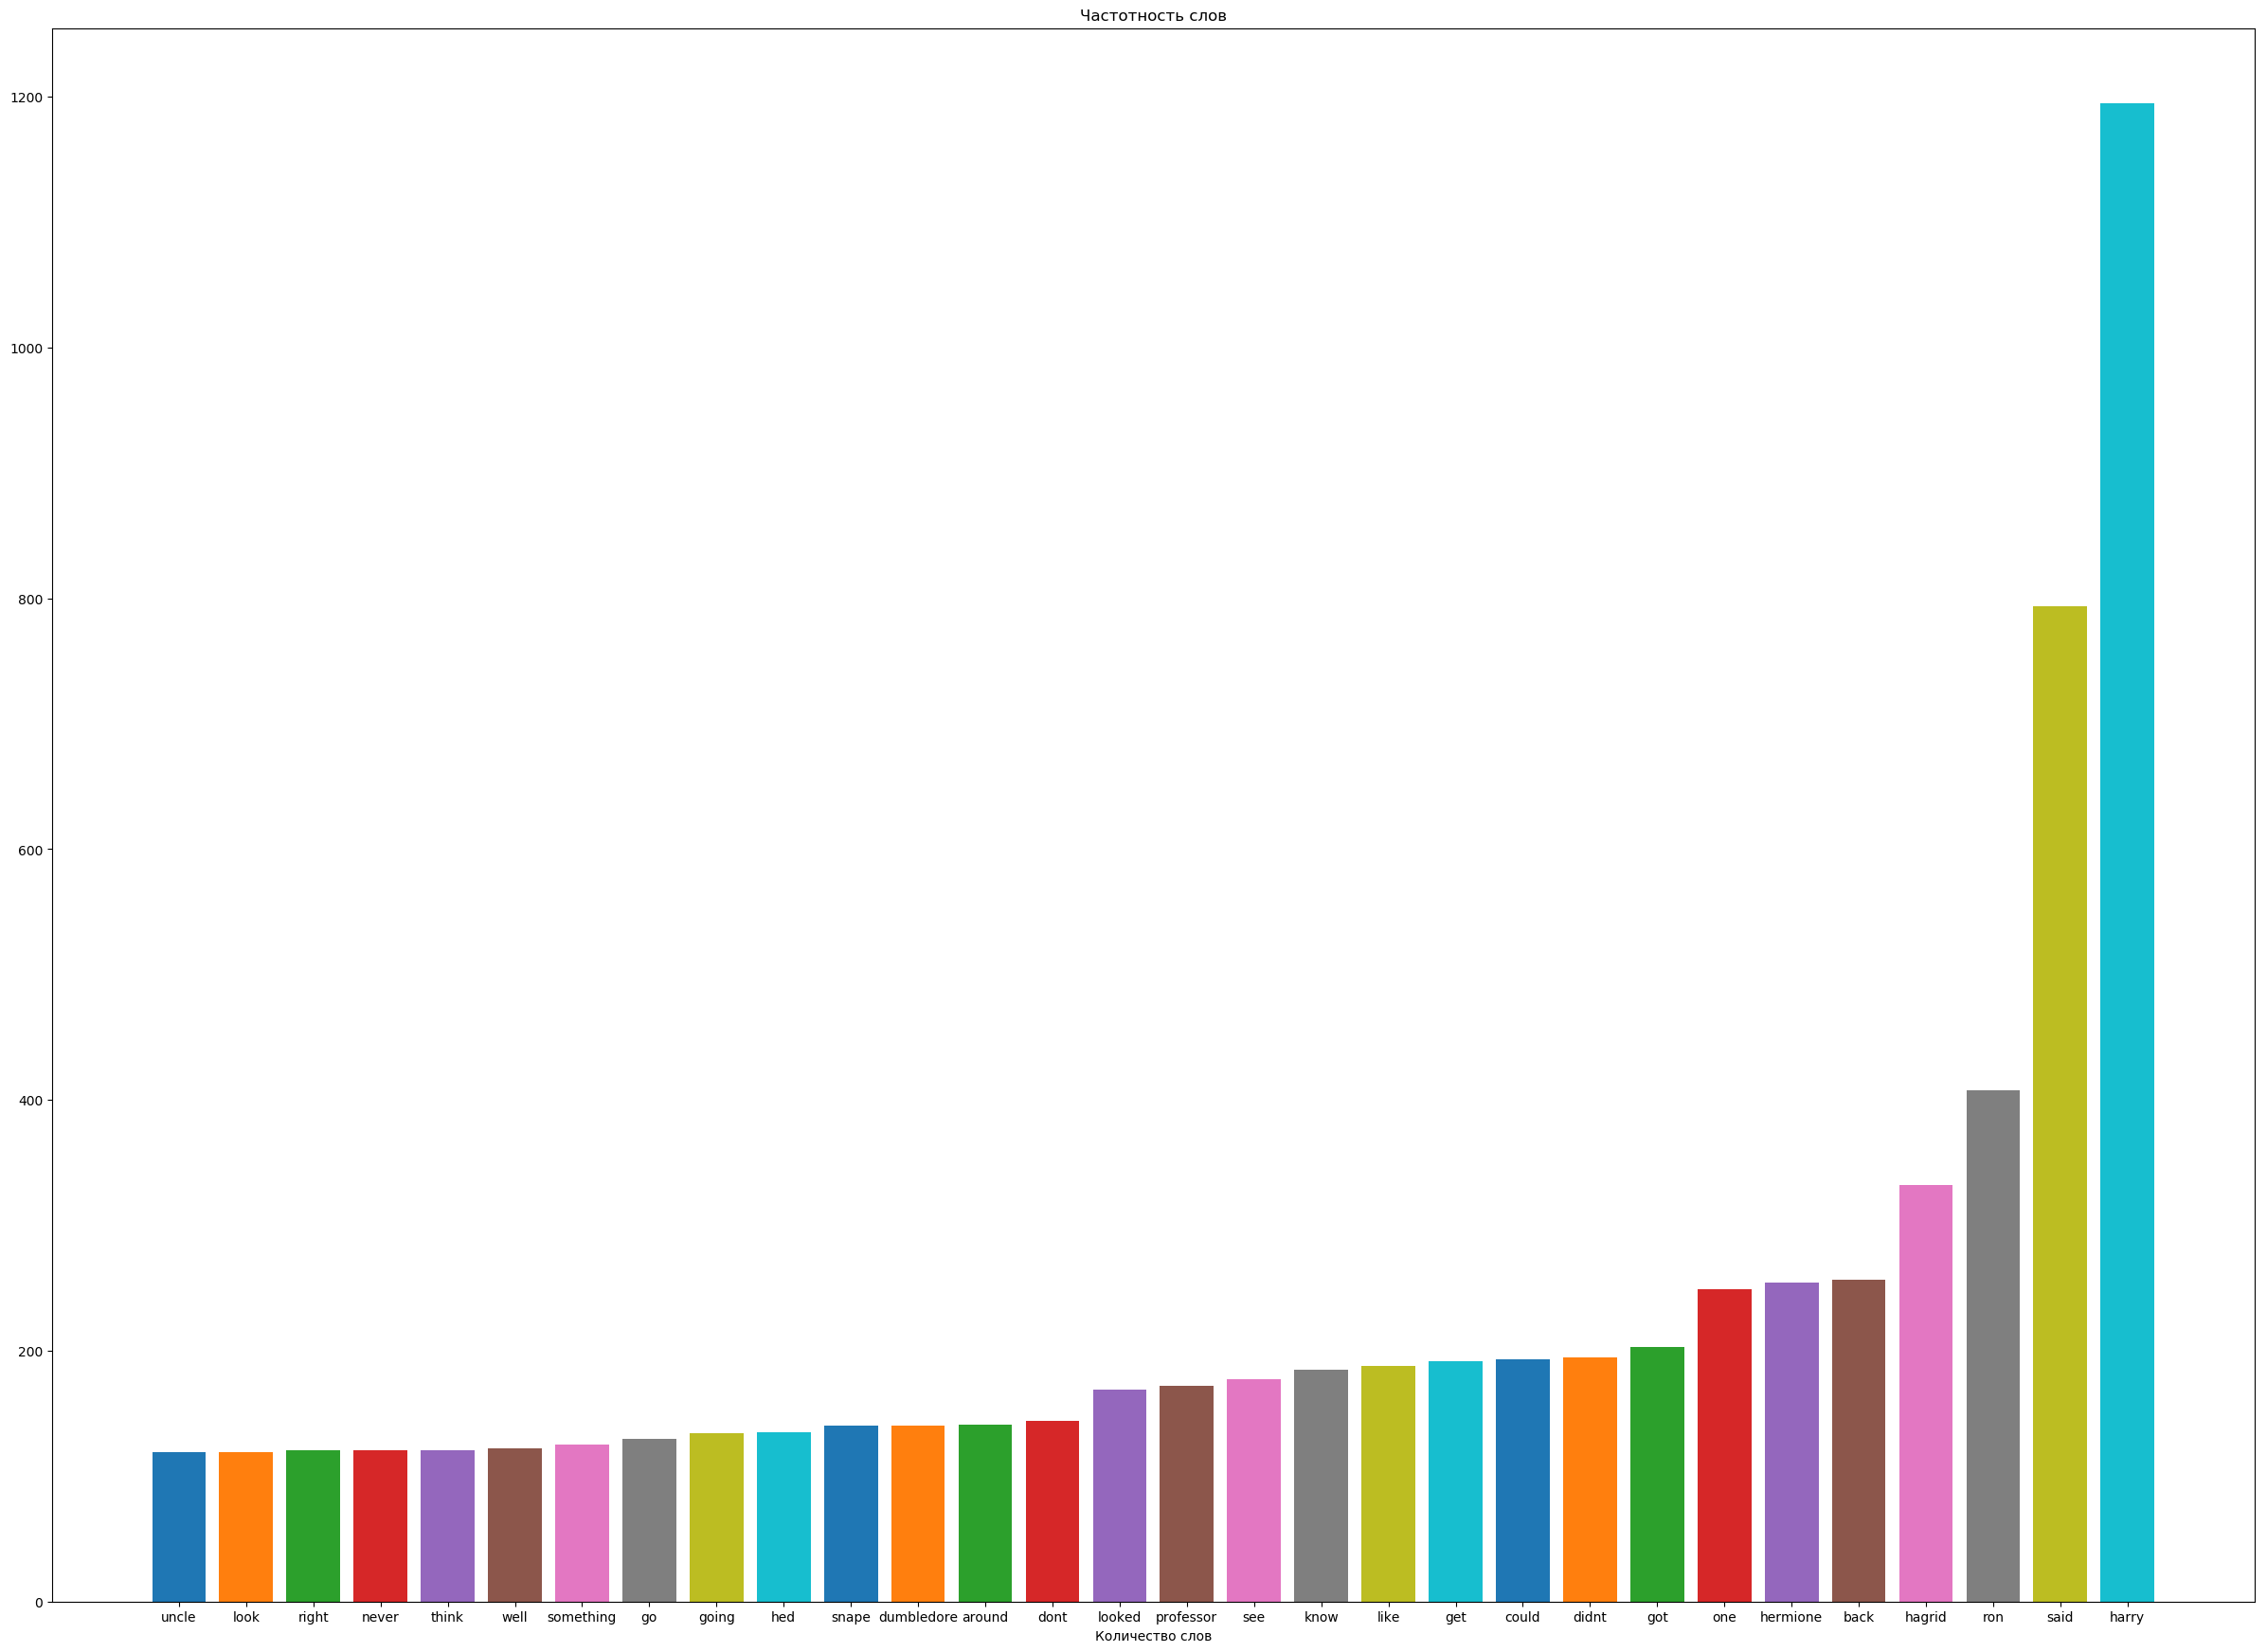

In [160]:
import seaborn
figure(figsize=(30, 22), dpi=100) #я честно не понимаю как сделать так,чтобы не накладывался текст.как в классе делала,не вышло
Y = [i[0] for i in words_clean_list]
X = [i[1] for i in words_clean_list]
for x, y in zip(X, Y):
    plt.bar(y, x)
    plt.title("Частотность слов")
    plt.xlabel("Количество слов")
plt.show()